In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/akkar/Crop Production data.csv")

In [3]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
df.size

1722637

In [6]:
df.shape

(246091, 7)

In [7]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
df['Production'] = df['Production'].dropna()

In [9]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
246086    False
246087    False
246088    False
246089    False
246090    False
Length: 246091, dtype: bool

In [11]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [12]:
df.corr()

C:\Users\akkar\AppData\Local\Temp\ipykernel_12752\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Crop_Year,Area,Production
Crop_Year,1.000000,-0.026022,0.006989
Area,-0.026022,1.000000,0.040587
Production,0.006989,0.040587,1.000000


### Features and Target
features = ['Area']  

target = 'Production'


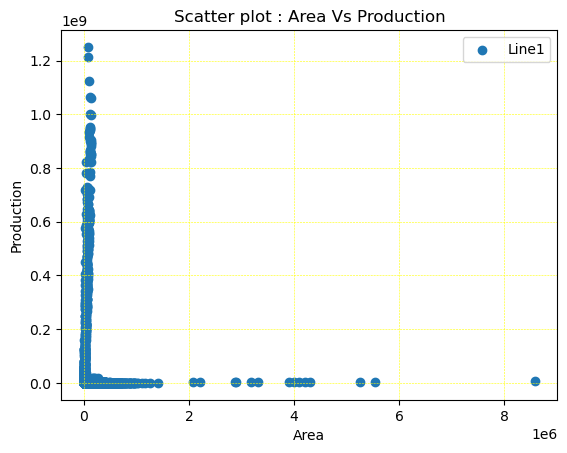

<Figure size 640x480 with 0 Axes>

In [13]:
plt.scatter(df['Area'],df['Production'])

plt.xlabel("Area")
plt.ylabel("Production")

plt.legend(["Line1"],loc='best')

plt.grid(True,color="yellow",linestyle="--",linewidth=0.4)

plt.title("Scatter plot : Area Vs Production")

plt.show()

plt.savefig("scatterplot.png")

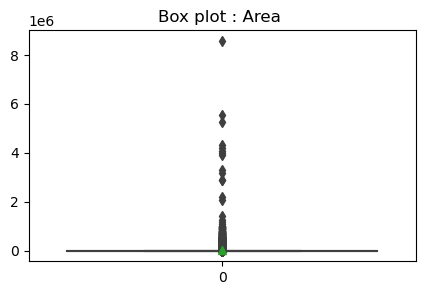

In [14]:
plt.figure(figsize=(5,3))

sns.boxplot(df['Area'],showmeans=True)

plt.title("Box plot : Area ")

plt.show()

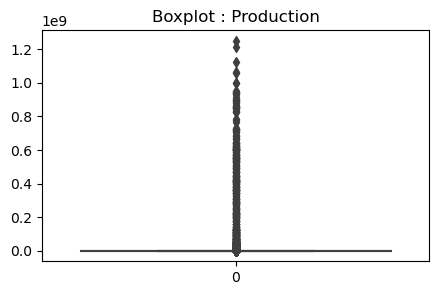

In [15]:
plt.figure(figsize=(5, 3))

sns.boxplot(df['Production'])

plt.title('Boxplot : Production')

plt.show()

In [16]:
df=df.dropna()

In [17]:
df.shape

(242361, 7)

In [18]:
Q1 = df.Production.quantile(0.25)
print(Q1)
Q3 = df.Production.quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

88.0
7023.0
6935.0


In [19]:
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

-10314.5
17425.5


In [20]:
filtered_df = df[(df['Production'] >= lower_bound) & (df['Production'] <= upper_bound)]
filtered_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0


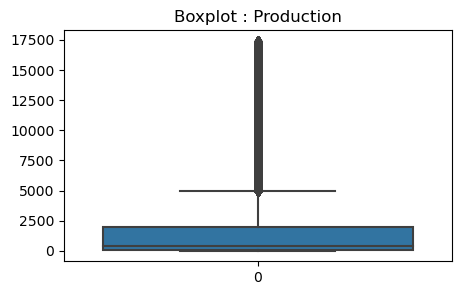

In [21]:
plt.figure(figsize=(5, 3))

sns.boxplot(filtered_df['Production'])

plt.title('Boxplot : Production')

plt.show()

In [22]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == "object":
        df[i] = le.fit_transform(df[i])
        print(le.classes_)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
['24 PARAGANAS NORTH' '24 PARAGANAS SOUTH' 'ADILABAD' 'AGAR MALWA' 'AGRA'
 'AHMADABAD' 'AHMEDNAGAR' 'AIZAWL' 'AJMER' 'AKOLA' 'ALAPPUZHA' 'ALIGARH'
 'ALIRAJPUR' 'ALLAHABAD' 'ALMORA' 'ALWAR' 'AMBALA' 'AMBEDKAR NAGAR'
 'AMETHI' 'AMRAVATI' 'AMRELI' 'AMRITSAR' 'AMROHA' 'ANAND' 'ANANTAPUR'
 'ANANTNAG' 'ANJAW' 'ANUGUL' 'ANUPPUR' 'ARARIA' 'ARIYALUR' 'ARWAL'
 'ASHOKNAGAR' 'AURAIYA' 'AURANGABAD' 'AZAMGARH' 'BADGAM' 'BAGALKOT'
 'BAGESHWAR' 'BAGHPAT' 'BAHRAICH' 'BAKSA' 'BALAGHAT' 'BALANGIR'
 'BALESHWAR' 'BALLIA' 'BALOD' 'BALODA BAZAR' 'BALRAMPUR' 'BANAS KAN

C:\Users\akkar\AppData\Local\Temp\ipykernel_12752\4170101988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\akkar\AppData\Local\Temp\ipykernel_12752\4170101988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
C:\Users\akkar\AppData\Local\Temp\ipykernel_12752\4170101988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [24]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0
...,...,...,...,...,...,...,...
246086,32,471,2014,3,95,306.0,801.0
246087,32,471,2014,3,102,627.0,463.0
246088,32,471,2014,4,106,324.0,16250.0
246089,32,471,2014,5,95,279151.0,597899.0


In [25]:
df.corr()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
State_Name,1.000000,-0.045010,-0.026002,-0.028548,0.013774,0.039070,-0.009502
District_Name,-0.045010,1.000000,-0.005558,0.017121,-0.005347,-0.019357,0.010130
Crop_Year,-0.026002,-0.005558,1.000000,-0.034248,0.002795,-0.025305,0.006989
Season,-0.028548,0.017121,-0.034248,1.000000,0.037093,-0.047684,0.045543
Crop,0.013774,-0.005347,0.002795,0.037093,1.000000,0.065100,-0.035280
Area,0.039070,-0.019357,-0.025305,-0.047684,0.065100,1.000000,0.040587
Production,-0.009502,0.010130,0.006989,0.045543,-0.035280,0.040587,1.000000


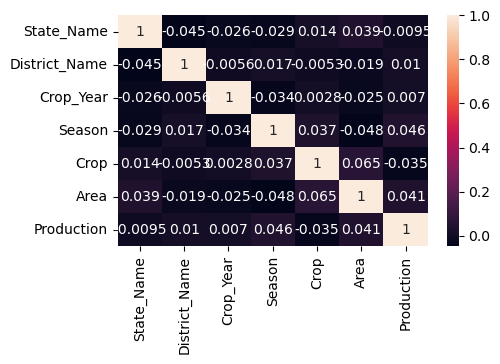

In [26]:
plt.figure(figsize=(5,3))

sns.heatmap(df.corr(),annot=True)

plt.show()

In [27]:
x = df.iloc[:,:-1]   #excluding target column
y = df.iloc[:,-1]

In [28]:
x

,State_Name,District_Name,Crop_Year,Season,Crop,Area
0,0,427,2000,1,2,1254.0
1,0,427,2000,1,74,2.0
2,0,427,2000,1,95,102.0
3,0,427,2000,4,7,176.0
4,0,427,2000,4,22,720.0
...,...,...,...,...,...,...
246086,32,471,2014,3,95,306.0
246087,32,471,2014,3,102,627.0
246088,32,471,2014,4,106,324.0
246089,32,471,2014,5,95,279151.0


In [29]:
y

0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
            ...   
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0
Name: Production, Length: 242361, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state = 0)

In [31]:
x_train

,State_Name,District_Name,Crop_Year,Season,Crop,Area
6919,1,566,2013,1,63,195.0
193586,28,366,2010,2,95,66287.0
158975,22,511,1997,5,3,54.0
170574,25,223,2006,4,44,287382.0
136337,17,554,2005,2,119,58900.0
...,...,...,...,...,...,...
180206,27,179,2003,4,87,128.0
120398,16,524,2001,1,25,5.0
176870,25,602,2008,1,116,7124.0
43653,4,532,2013,1,102,100.0


In [32]:
x_test

,State_Name,District_Name,Crop_Year,Season,Crop,Area
116287,16,426,2010,1,116,4309.0
212921,30,213,2003,2,67,65.0
6248,1,463,2013,2,67,67.0
46869,6,66,2011,1,87,3.0
166807,25,79,2010,2,123,632.0
...,...,...,...,...,...,...
237346,32,1,2013,4,106,27.0
78477,14,71,1999,2,41,26089.0
143130,21,160,2008,1,59,5270.0
16074,3,155,1999,4,106,216.0


In [33]:
y_train

6919          80.0
193586    185537.0
158975        12.0
170574     76256.0
136337     69200.0
            ...   
180206      1995.0
120398         2.0
176870      1623.0
43653         87.0
202884        11.0
Name: Production, Length: 169652, dtype: float64

In [34]:
y_test

116287     1959.0
212921      933.0
6248       1241.0
46869        18.0
166807      258.0
           ...   
237346     2706.0
78477     21028.0
143130     9530.0
16074      8567.0
118917    27285.0
Name: Production, Length: 72709, dtype: float64

In [41]:
from sklearn.ensemble import RandomForestRegressor
model_filtered = RandomForestRegressor(n_estimators=100, random_state=42)
model_filtered.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:
y_pred = model_filtered.predict(x_test)

In [43]:
y_pred

array([ 1814.601,   886.7  ,  1173.76 , ...,  7802.1  ,  8470.73 ,
       27899.46 ])

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2_score= r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [47]:
mse

27147621935643.957

In [48]:
r2_score

0.8946693085704898

In [51]:
rmse

5210337.986699515